# **Multiple Linear Regression Model**
#### *Case Study: Student Performance*
##### Data Scientist: Zacharia Bachtiar

## **Business Problem Understanding**

**Context**  

A school is committed to enhancing student performance by understanding the key factors that influence academic success. By analyzing data on students' study habits, attendance, parental involvement, and other variables, the school aims to identify patterns that can improve learning outcomes. 

With this knowledge, they can allocate resources more effectively and target students and areas that need attention. Personalized support becomes central to this approach, allowing educators to tailor interventions to individual students’ needs, ultimately leading to **improved academic performance, higher engagement, and reduced dropout rates**.

**Problem Statement**

The school aims to increase educational quality by increasing academic performance of each student. **The level of academic performance also impact the rate of students dropout**, which is a crucial key of the schools overall performance. By knowing in advance which students need academic support, the school can minimize dropout rates by giving more attention to students that need it.

Kaggle : https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

**Goals**
- **Identifying At-Risk Students**: Schools can pinpoint students who may struggle or fall behind, allowing for early interventions to provide additional support and prevent academic failure or dropout.
- **Identify Key Predictors**: Determine which factors (e.g., study time, attendance, parental involvement) significantly impact student grades.


**Analytic Approach**

As a data scientist, i will develop a **multiple linear regression model** that can accurately predict the probability of each students academic performance based on several key features.

In this approach, it will also be revealed the impact of each feature to the target label.

**Metric Evaluation**
- **Adjusted R-squared**: Adjusts the R² value based on the number of predictors, providing a more accurate measure when multiple variables are involved.
- **Root Mean Squared Error (RMSE)**: The square root of MSE, offering interpretability in the same units as the target variable.
- **Residual Analysis**: Examines the differences between predicted and actual values to check for patterns that may indicate model inadequacies.

## **Data Understanding**

In [120]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Normality test
import scipy.stats as stats

# Scaler for feature scaling
from sklearn.preprocessing import MinMaxScaler

# Encoders for categorical variables
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor 

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

# Model Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score

# Pipeline for Preprocessing and Modeling
from sklearn.pipeline import Pipeline

In [104]:
df = pd.read_csv('Student_Performance.csv')
display(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


None

> Notes:
> - Dataset contains historical data of students overall performance.
> - Dataset contains around 10000 rows.
> - Most of the feature has an integer data type.

| Feature                         | Description                                                                                     |
|---------------------------------|-------------------------------------------------------------------------------------------------|
| Hours Studied                   | The total number of hours spent studying by each student.                                       |
| Previous Scores                 | The scores obtained by students in previous tests.                                             |
| Extracurricular Activities      | Whether the student participates in extracurricular activities (Yes or No).                    |
| Sleep Hours                     | The average number of hours of sleep the student had per day.                                  |
| Sample Question Papers Practiced| The number of sample question papers the student practiced.                                    |
| Performance Index  | A measure of the overall performance of each student, ranging from 10 to 100, with higher values indicating better performance. |

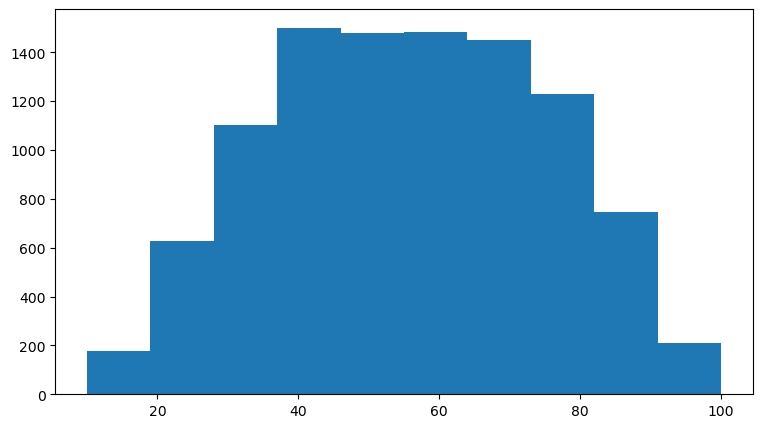

In [105]:
plt.figure(figsize=(9, 5))
plt.hist(df['Performance Index'])
plt.show()

> Notes:
> - The performance of overall students looks normally distributed.

## **Data Preparation**

#### **Handle Missing Values**

In [106]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

> Notes:
> - Dataset is clean from missing values.

#### **Handle Inconsistencies**

In [107]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


> Notes:
> - The values ranges from each numerical features looks plausable (makes sense) and consistent.

#### **Handle Outlier**

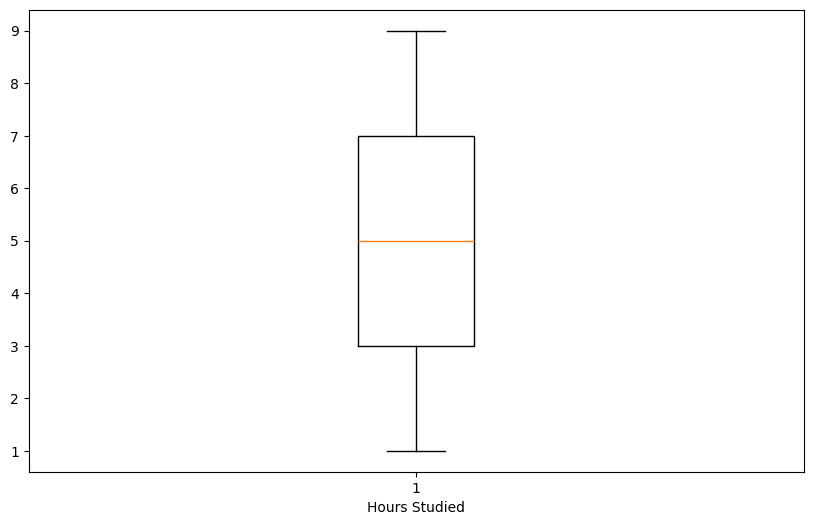

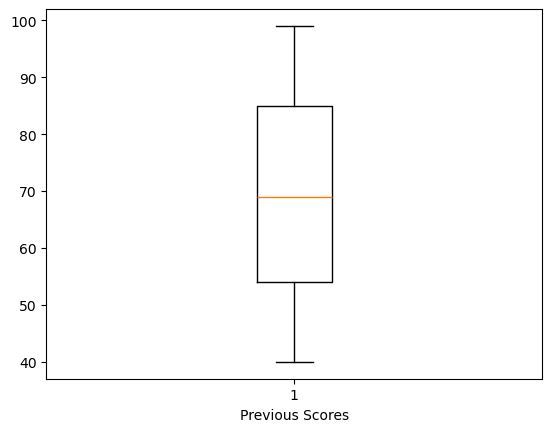

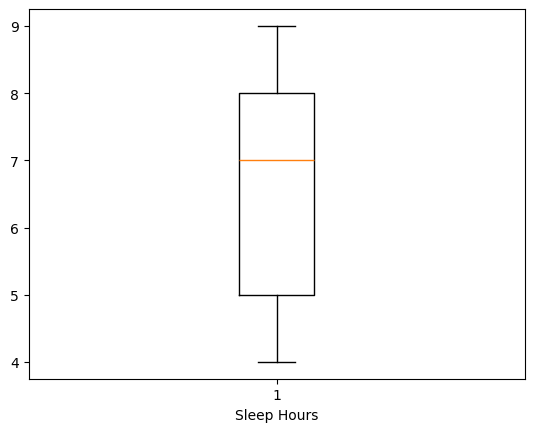

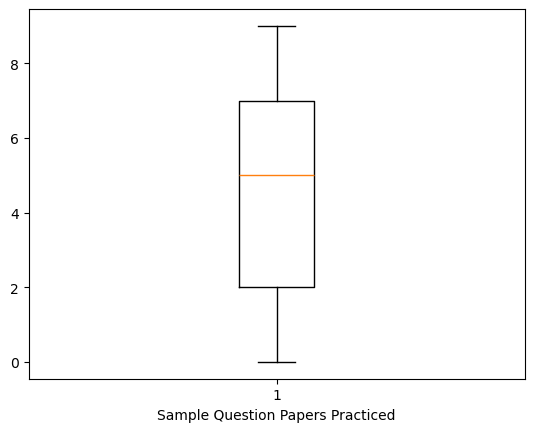

In [108]:
num_features = df.drop('Performance Index', axis=1).select_dtypes(include='number')

plt.figure(figsize=(10, 6))
for i in num_features:
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

> Notes:
> - Dataset is clean from any sort of outliers that can distort model performance.

#### **Normality Test**

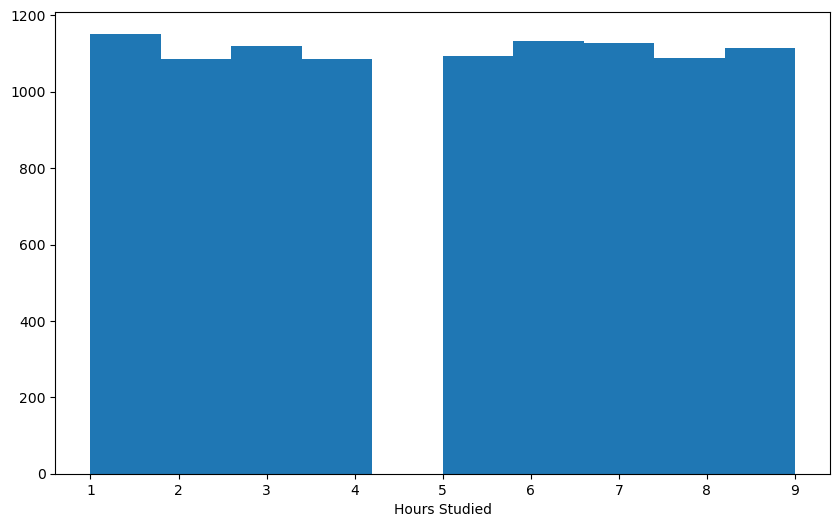

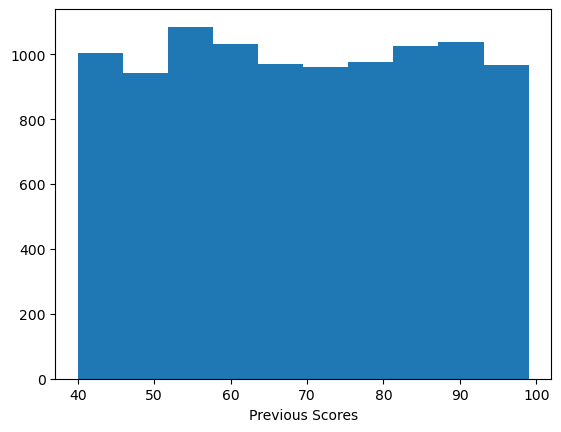

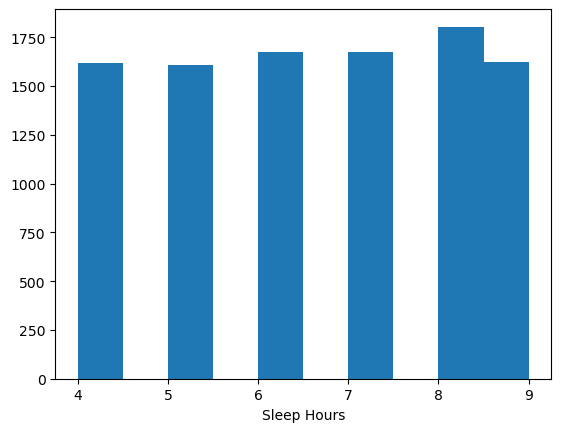

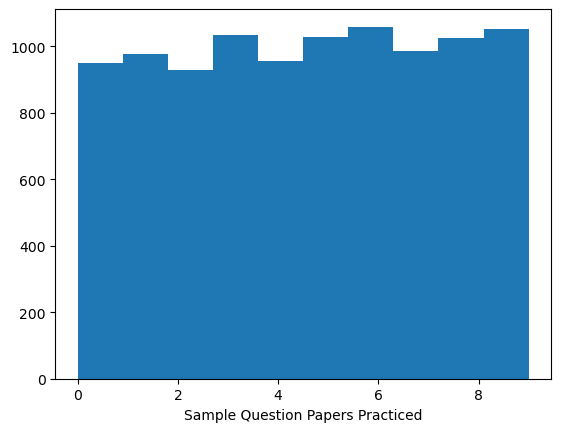

In [109]:
num_features = df.drop('Performance Index', axis=1).select_dtypes(include='number')

plt.figure(figsize=(10, 6))
for i in num_features:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.show()

In [110]:
results = []

def normality_test(data, col_name):
    stat, p_value = stats.normaltest(data)
    is_normal = 'Normal' if p_value > 0.05 else 'Not Normal'
    results.append({'Column': col_name, 'p-value': p_value, 'Normality': is_normal})

for col in df.drop('Performance Index',axis=1).select_dtypes(include='number'):
    normality_test(df[col], col)

normality_results_df = pd.DataFrame(results)

normality_results_df

,Column,p-value,Normality
0,Hours Studied,0.0,Not Normal
1,Previous Scores,0.0,Not Normal
2,Sleep Hours,0.0,Not Normal
3,Sample Question Papers Practiced,0.0,Not Normal


> Notes:
> - Each numerical features seems uniform and displays no skew.
> - p-value of each feature also below 0.05 which means that it is not normally distributed.

#### **Feature Engineering**

##### **Bin Previous Scores**

In [111]:
# Using qcut with retbins=True to see the bin ranges
df['Previous_Scores_Binned'], bins = pd.qcut(df['Previous Scores'], q=3, labels=['Low', 'Medium', 'High'], retbins=True)

# Print the bin edges
print("Bin edges:", bins)

df.sample(5)

Bin edges: [40. 59. 80. 99.]


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Previous_Scores_Binned
3696,1,63,No,9,6,41.0,Medium
7509,9,62,No,8,7,57.0,Medium
421,2,43,Yes,5,3,21.0,Low
7521,1,64,No,4,4,40.0,Medium
2636,1,97,Yes,8,7,73.0,High


| **Feature**            | **Category**        | **Description**                                                                |
|----------------------|---------------------|-------------------------------------------------------------------------------|
| **Previous Scores**           | Low          | Low scoring student within the range of 40-59. |
|                      | Medium         | Well scored students within the range of 59-80. |
|                      | High      | Excelent performing students within the score range of 80-99. |


> Notes:
> - We categorized the previous score values into 3 distinct category (Low, Medium, High).
> - This allows the model to learn the data easily through category on top of the high variance of continuous data.

##### **Polynomial Features**

In [112]:
df['Hours_Studied_Squared'] = df['Hours Studied'] ** 2
df['Sleep_Hours_Squared'] = df['Sleep Hours'] ** 2
df['Sample_Question_Papers_Practiced_Squared'] = df['Sample Question Papers Practiced'] ** 2

df.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Previous_Scores_Binned,Hours_Studied_Squared,Sleep_Hours_Squared,Sample_Question_Papers_Practiced_Squared
8520,4,63,Yes,5,9,47.0,Medium,16,25,81
9859,4,52,Yes,5,0,35.0,Low,16,25,0
6056,1,64,No,7,2,37.0,Medium,1,49,4
3332,6,93,Yes,9,5,84.0,High,36,81,25
7696,9,85,Yes,4,0,82.0,High,81,16,0


> Notes:
> - By making polynomial features, the values which before looks very similar to each other because of its similar ranges, now can be differentiated more easily.

## **Data Analysis**

#### **Numerical Features**

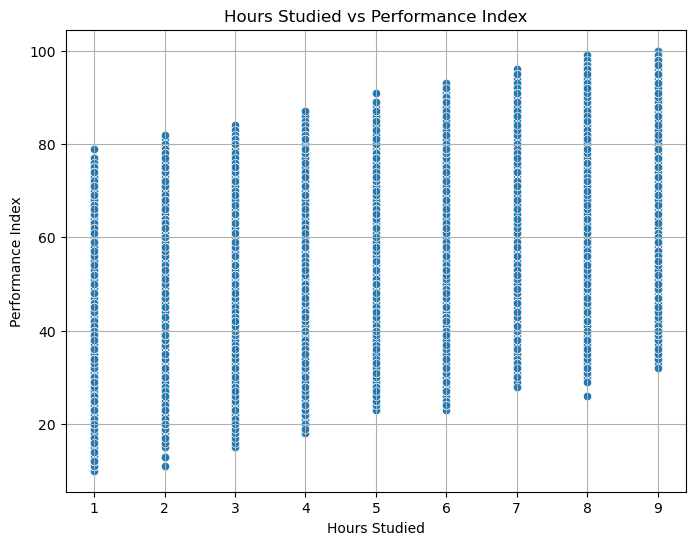

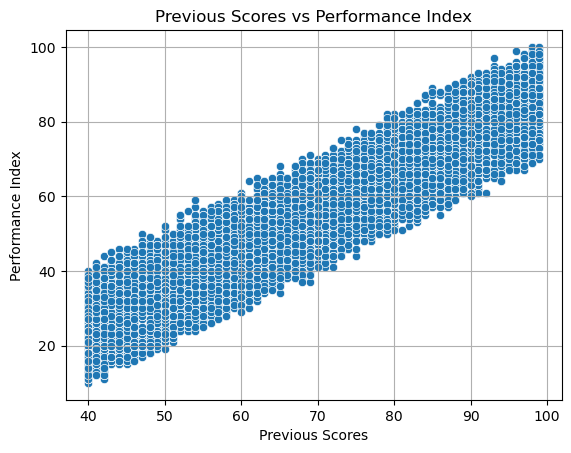

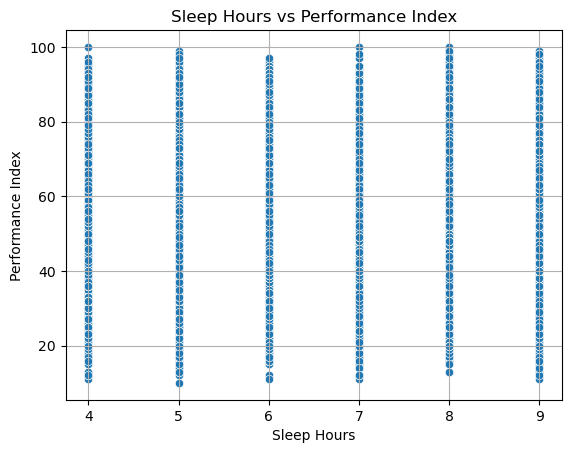

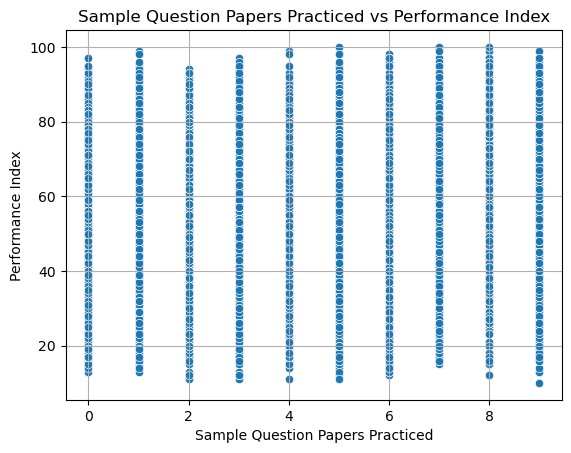

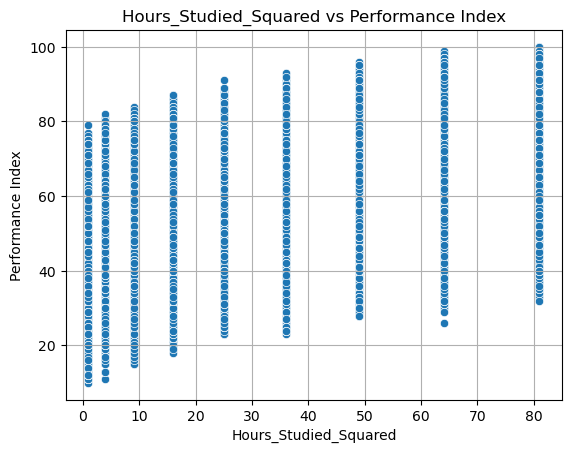

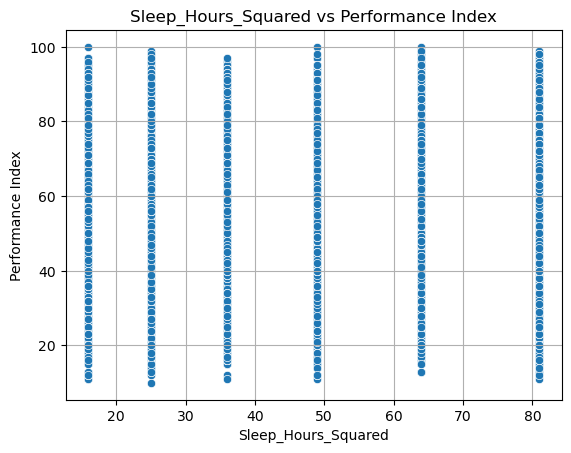

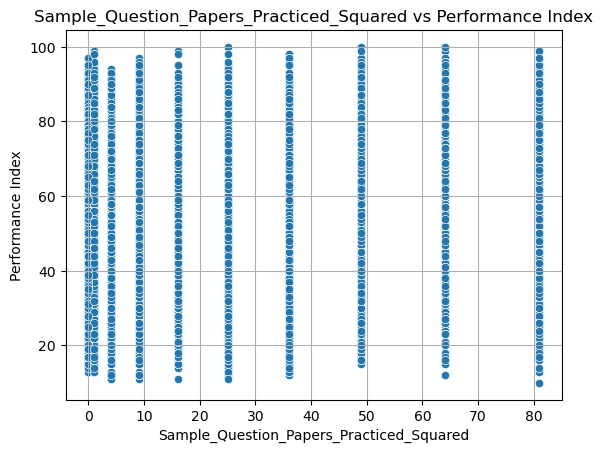

In [113]:
plt.figure(figsize=(8, 6))

for col in df.drop('Performance Index',axis=1).select_dtypes(include='number'):
    sns.scatterplot(x=col, y='Performance Index', data=df)
    plt.title(f'{col} vs Performance Index')
    plt.xlabel(col)
    plt.ylabel('Performance Index')
    plt.grid(True)
    plt.show()

> Notes:
> - `Hours Studied` and `Previous Test Scores` have a huge impact on student performance. It shows a positive correlation between them.
> - While `Sleep Hours` and `Sample Paper Practiced` shows little to no correlation and effect on the student performance.

#### **Categorical Features**

,Performance Index
Extracurricular Activities,
No,54.758511
Yes,55.700889


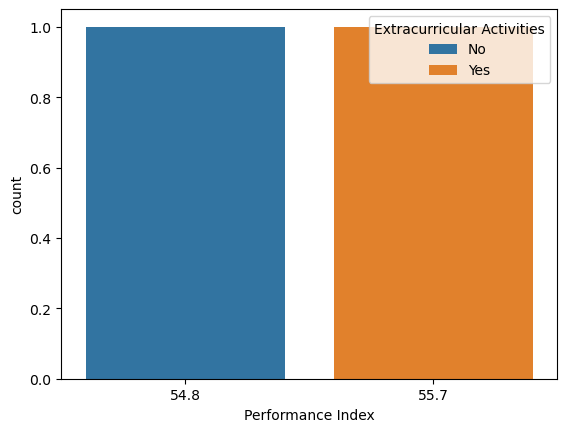

In [114]:
pie_data = pd.DataFrame(df.groupby('Extracurricular Activities')['Performance Index'].mean())

sns.countplot(x=round(pie_data['Performance Index'], 1), hue=pie_data.index)

pie_data

> Notes:
> - Students attending `Extracurricular Activities` scores a little bit higher on the performance.

## **Modeling and Evaluation**

#### **Split Data**

In [115]:
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (8000, 9)
Test set shape: (2000, 9)


> Notes:
> - Splitting the data into train and test set with a ratio of 80:20.

#### **Preprocessing**

In [116]:
numerical_features = [col for col in X_train.select_dtypes(include='number').columns]
object_features = [col for col in X_train.select_dtypes(include='object').columns]
categorical_features = [col for col in X_train.select_dtypes(include='category').columns]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),  
        ('cat', OneHotEncoder(drop='first'), object_features),  
        ('ord', OrdinalEncoder(categories=[['Low', 'Medium','High']]), categorical_features)      
    ])

> Notes:
> - Using MinMax Scaler to scale the data for distance based models like KNN. MinMax is chosen too because the dat ais not normally distributed and there is no outlier
> - OneHot is used for data with 2 distict values like `Extraculicular Activities` while Ordinal is used for features with ranking like previous score binning.

#### **Training Model (Base)**

In [117]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Neighbors Regressor': KNeighborsRegressor()
}

results_list = []

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', model)])
    
    pipeline.fit(X_train, y_train)
    
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Calculate RMSE and R²
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)

    # Calculate Adjusted R²
    n_test = X_test.shape[0]    
    p_test = X_test.shape[1] 
    adj_test_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)
    
    # Append results to the list
    results_list.append({'Model': model_name,
                         'Train RMSE': train_rmse,
                         'Test RMSE': test_rmse,
                         'Adj Test R²': adj_test_r2})

results = pd.DataFrame(results_list)

# Sort results by Test RMSE
results = results.sort_values(by='Test RMSE')
results

,Model,Train RMSE,Test RMSE,Adj Test R²
0,Linear Regression,2.041652,2.020504,0.988934
1,Ridge Regression,2.043389,2.023440,0.988902
4,Gradient Boosting,2.035443,2.089171,0.988169
3,Random Forest,0.971528,2.276432,0.985953
5,Support Vector Regressor,2.403182,2.452578,0.983695
6,K-Neighbors Regressor,3.250991,4.009823,0.956416
2,Lasso Regression,7.147700,7.197662,0.859572


> Notes:
> - Regression models seems to fit the data best showing lowest RMSE and Highest fit score of R2, followed by tree-based models.

#### **Training Model (Feature Selection vs No Feature Selection)**

In [118]:
results_fs_list = []

for model_name, model in models.items():
    # With Feature Selection
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                        ('feature_selector', SelectKBest(score_func=f_regression, k=5)),
                                        ('model', model)])
    
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate RMSE and R² with feature selection
    train_rmse_fs = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse_fs = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2_fs = r2_score(y_test, y_test_pred)

    results_fs_list.append({'Model': model_name,
                             'Train RMSE (With FS)': train_rmse_fs,
                             'Test RMSE (With FS)': test_rmse_fs,
                             'Test R² (With FS)': test_r2_fs})

results_fs = pd.DataFrame(results_fs_list)

results_fs = results_fs.sort_values(by='Test RMSE (With FS)')
results_fs

,Model,Train RMSE (With FS),Test RMSE (With FS),Test R² (With FS)
0,Linear Regression,2.136852,2.133944,0.987712
1,Ridge Regression,2.138501,2.138141,0.987664
4,Gradient Boosting,2.131873,2.184477,0.987123
5,Support Vector Regressor,2.280050,2.302070,0.985700
6,K-Neighbors Regressor,1.963753,2.413980,0.984275
3,Random Forest,1.724233,2.445288,0.983865
2,Lasso Regression,7.147700,7.197662,0.860204


In [119]:
final_result = pd.merge(results, results_fs, on='Model')
final_result

,Model,Train RMSE,Test RMSE,Adj Test R²,Train RMSE (With FS),Test RMSE (With FS),Test R² (With FS)
0,Linear Regression,2.041652,2.020504,0.988934,2.136852,2.133944,0.987712
1,Ridge Regression,2.043389,2.023440,0.988902,2.138501,2.138141,0.987664
2,Gradient Boosting,2.035443,2.089171,0.988169,2.131873,2.184477,0.987123
3,Random Forest,0.971528,2.276432,0.985953,1.724233,2.445288,0.983865
4,Support Vector Regressor,2.403182,2.452578,0.983695,2.280050,2.302070,0.985700
5,K-Neighbors Regressor,3.250991,4.009823,0.956416,1.963753,2.413980,0.984275
6,Lasso Regression,7.147700,7.197662,0.859572,7.147700,7.197662,0.860204


> Notes:
> - With the low number of feature at the start (9 features total with feature engineering), it seems limitting it with Feature Selection affects the performance of the models (higher RMSE than default).

#### **Hyperparameter Tuning**

In [125]:
# Define parameter grids for top 3 model
param_grid_lr = {
    'model__fit_intercept': [True, False],
}

param_grid_ridge = {
    'model__alpha': [0.1, 1.0, 10.0, 100.0],
    'model__fit_intercept': [True, False],
}

param_grid_gb = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
}

In [126]:
def adjusted_r2(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [127]:
tuning_models = {
    'Linear Regression': (LinearRegression(), param_grid_lr),
    'Ridge Regression': (Ridge(), param_grid_ridge),
    'Gradient Boosting': (GradientBoostingRegressor(), param_grid_gb),
}

tuning_results = []

for model_name, (model, param_grid) in tuning_models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', model)])
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and calculate the best RMSE
    best_params = grid_search.best_params_
    
    # Evaluate on the test set
    y_test_pred = grid_search.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Calculate Adjusted R² for test set
    n_test = len(y_test) 
    p = X_test.shape[1]   
    test_adjusted_r2 = adjusted_r2(y_test, y_test_pred, n_test, p)

    tuning_results.append({
        'Model': model_name,
        'Best Parameters': best_params,
        'Test RMSE': test_rmse,
        'Test Adjusted R²': test_adjusted_r2
    })

tuning_results_df = pd.DataFrame(tuning_results)

tuning_results_df


,Model,Best Parameters,Test RMSE,Test Adjusted R²
0,Linear Regression,{'model__fit_intercept': True},2.020504,0.988934
1,Ridge Regression,"{'model__alpha': 0.1, 'model__fit_intercept': ...",2.020637,0.988933
2,Gradient Boosting,"{'model__learning_rate': 0.1, 'model__max_dept...",2.072342,0.988359


> Notes:
> - The top 3 models was hypertuned to find the best possible combinations.
> - Linear Regression Model didnt increase in performance while the other two has lower RMSE and higher R2 after tuning, although not very significant.
> - Best performing model was **Linear Regression**

#### **Residual Analysis**

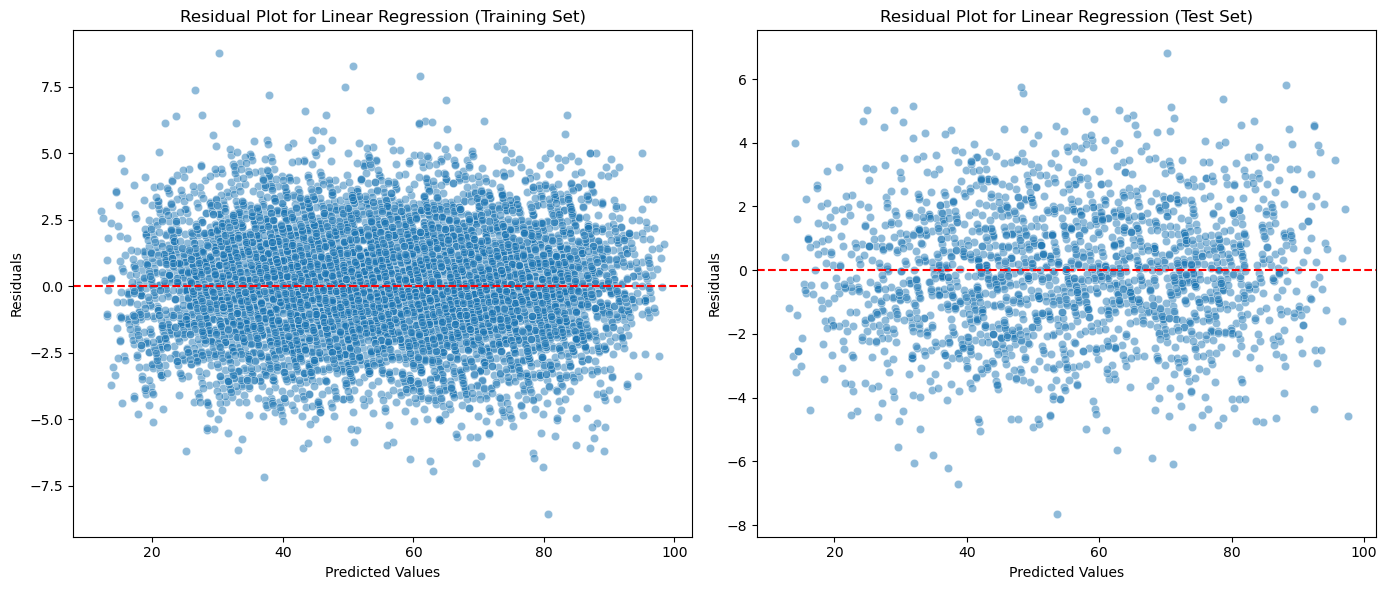

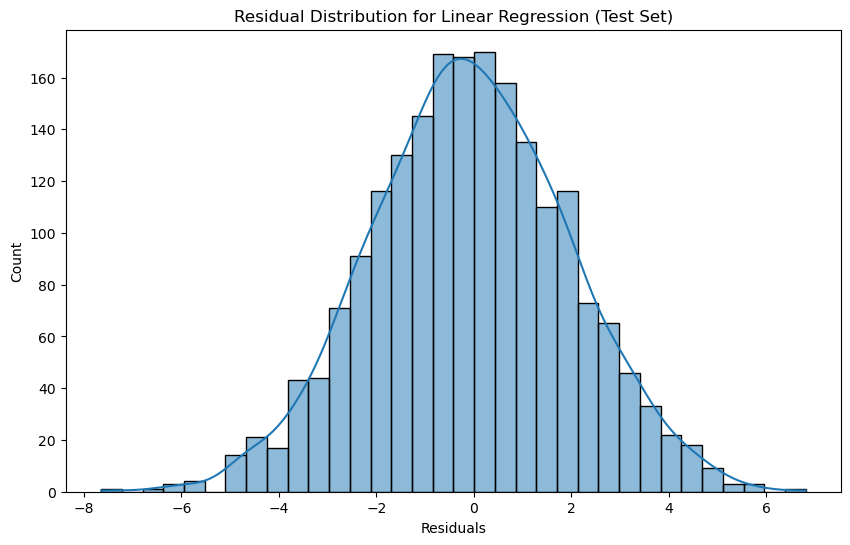

In [130]:
best_model_name = 'Linear Regression'
best_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', LinearRegression())])

best_pipeline.fit(X_train, y_train)
y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Plot residuals for training set
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred, y=train_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title(f'Residual Plot for {best_model_name} (Training Set)')

# Plot residuals for test set
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_pred, y=test_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title(f'Residual Plot for {best_model_name} (Test Set)')

plt.tight_layout()
plt.show()

# Histogram of residuals for test set
plt.figure(figsize=(10, 6))
sns.histplot(test_residuals, kde=True)
plt.xlabel('Residuals')
plt.title(f'Residual Distribution for {best_model_name} (Test Set)')
plt.show()

> Notes:
> - From the scatter plots above, we can confidently say that the residual has no pattern. Whether the predicted values are high or low, it seems to follow a pretty uniform structure of errors.
> - Same case with the histogram above, shows the residuals has a normal distribution, thus no visible skewness. We can say that the model doesnt overestimate nor underestimate the predicted values.

#### **Feature Evaluation**

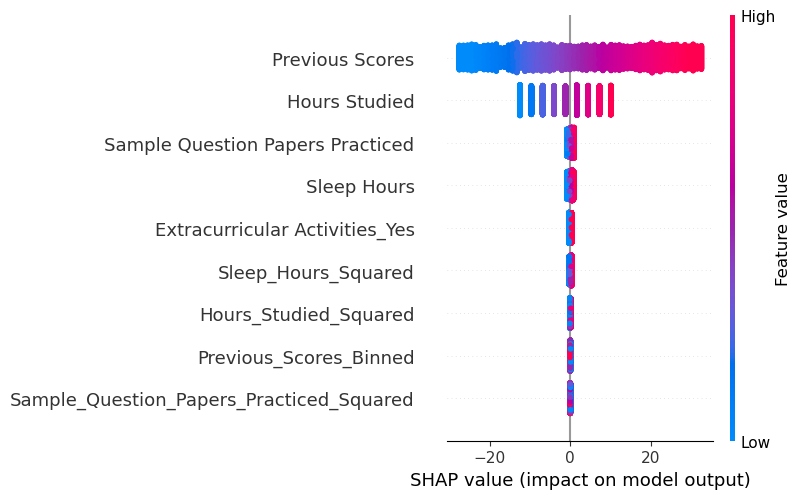

In [137]:
import shap

preprocessor.fit(X_train)

numerical_features = preprocessor.named_transformers_['num'].get_feature_names_out()
onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(object_features)
ordinal_feature_names = categorical_features 

all_feature_names = list(numerical_features) + list(onehot_feature_names) + ordinal_feature_names

final_model = LinearRegression()
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', final_model)])
final_pipeline.fit(X_train, y_train)

X_train_processed = preprocessor.transform(X_train)

# Create a SHAP explainer using the final model and preprocessed data
explainer = shap.Explainer(final_pipeline.named_steps['model'], X_train_processed, feature_names=all_feature_names)

# Calculate SHAP values
shap_values = explainer(X_train_processed)

shap.summary_plot(shap_values, X_train_processed, feature_names=all_feature_names)

> Notes:
> - The result is similar to the EDA we did earlier, showing `Previous Scores` and `Hours Studied` to be the biggest contributions to the overall performance of each students.
> - The higher the previous scores and hours studied, often the performance is also higher

#### **Saving Model**

In [138]:
import joblib

model_filename = 'final_model_pipeline.pkl'
# joblib.dump(final_pipeline, model_filename)

print(f"Model pipeline saved as {model_filename}")

Model pipeline saved as final_model_pipeline.pkl


#### **Limitation**

In [139]:
# numerical limitations
print('Numerical Limitations:')
display(X.describe())

# categorical limitations
print('Categorical Limitations:')
categorical_summary_list = []

for column in X.select_dtypes(include=['object', 'category']):
    unique_counts = X[column].value_counts()
    unique_values = ', '.join([f"{value} ({count})" for value, count in unique_counts.items()])
    categorical_summary_list.append({
        'Feature': column,
        'Allowed Values For Best Estimate': unique_values
    })

categorical_summary = pd.DataFrame(categorical_summary_list)
categorical_summary

Numerical Limitations:


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Hours_Studied_Squared,Sleep_Hours_Squared,Sample_Question_Papers_Practiced_Squared
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.992900,69.445700,6.530600,4.583300,31.632900,45.524400,29.22750
std,2.589309,17.343152,1.695863,2.867348,26.487769,22.175224,26.99128
min,1.000000,40.000000,4.000000,0.000000,1.000000,16.000000,0.00000
25%,3.000000,54.000000,5.000000,2.000000,9.000000,25.000000,4.00000
50%,5.000000,69.000000,7.000000,5.000000,25.000000,49.000000,25.00000
75%,7.000000,85.000000,8.000000,7.000000,49.000000,64.000000,49.00000
max,9.000000,99.000000,9.000000,9.000000,81.000000,81.000000,81.00000


Categorical Limitations:


,Feature,Allowed Values For Best Estimate
0,Extracurricular Activities,"No (5052), Yes (4948)"
1,Previous_Scores_Binned,"Medium (3439), Low (3371), High (3190)"


## **Conclusion & Recommendation**

### **Conclusion**

Based on the hyperparameter tuning results and SHAP analysis, we can draw several key conclusions about the models and the factors affecting student performance:

1. **Model Performance**:
   - The **Linear Regression** model achieved the best performance with the lowest Test RMSE of **2.0205** and the highest Test Adjusted R² of **0.9889**. This indicates that the model explains approximately 98.89% of the variance in the test set.
   - The **Ridge Regression** model closely followed with a Test RMSE of **2.0206** and a slightly lower Adjusted R² of **0.9889**.
   - The **Gradient Boosting** model, while also effective, had a higher Test RMSE of **2.0723** and a lower Adjusted R² of **0.9884**. 

2. **Feature Importance**:
   - The SHAP analysis revealed that the most significant features influencing student performance are the **previous scores** and **hours studied**. This indicates a strong relationship between prior academic achievement and current performance, along with the impact of study time.

### **Recommendations**

1. **Focus on Study Habits**:
   - Given the significant impact of study hours on performance, educational institutions should implement programs that encourage effective study habits and time management among students. Workshops and resources on study techniques may be beneficial.

2. **Targeted Support for Struggling Students**:
   - Implement additional support for students who may have lower previous scores. This could include tutoring, mentoring programs, or tailored learning resources to help improve their foundational knowledge.

3. **Leverage Data for Continuous Improvement**:
   - Utilize the findings from this model to continually refine and improve educational strategies. Regularly assess the performance of students and adapt interventions as necessary based on real-time data analytics.

4. **Model Validation**:
   - Continue validating the model on new data to ensure its robustness and relevance. Consider exploring additional features that may contribute to student performance in future iterations.

5. **Monitor External Factors**:
   - Keep an eye on external factors (such as mental health, extracurricular activities, etc.) that might also influence performance, and consider incorporating these into future analyses.

By focusing on the identified critical factors and implementing targeted strategies, educational institutions can enhance student performance and optimize learning outcomes.